In [130]:
import pandas as pd

csv_file_path = '/Users/ataberkfirat/Desktop/games.csv'

df_csv = pd.read_csv(csv_file_path)

print(df_csv.head())


                         AppID          Name Release date  Estimated owners  \
20200         Galactic Bowling  Oct 21, 2008    0 - 20000                 0   
655370            Train Bandit  Oct 12, 2017    0 - 20000                 0   
1732930           Jolt Project  Nov 17, 2021    0 - 20000                 0   
1355720               Henosis™  Jul 23, 2020    0 - 20000                 0   
1139950  Two Weeks in Painland   Feb 3, 2020    0 - 20000                 0   

         Peak CCU  Required age  Price  DiscountDLC count  \
20200           0         19.99      0                  0   
655370          0          0.99      0                  0   
1732930         0          4.99      0                  0   
1355720         0          5.99      0                  0   
1139950         0          0.00      0                  0   

                                            About the game  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a s

In [132]:
json_file_path = '/Users/ataberkfirat/Desktop/games.json'

df_json = pd.read_json(json_file_path)

print(df_json.head())


                       20200         655370        1732930       1355720  \
name          Galactic Bowling  Train Bandit  Jolt Project      Henosis™   
release_date      Oct 21, 2008  Oct 12, 2017  Nov 17, 2021  Jul 23, 2020   
required_age                 0             0             0             0   
price                    19.99          0.99          4.99          5.99   
dlc_count                    0             0             0             0   

                            1139950         1469160      1659180  \
name          Two Weeks in Painland  Wartune Reborn    TD Worlds   
release_date            Feb 3, 2020    Feb 26, 2021  Jan 9, 2022   
required_age                      0               0            0   
price                           0.0             0.0        10.99   
dlc_count                         0               0            1   

                                         1968760                1178150  \
name          Legend of Rome - The Wrath of Mars  MazM: Jek

In [133]:
!pip install textblob

In [134]:
print(df_csv.columns)

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [142]:
from textblob import TextBlob
df_csv = pd.read_csv('/Users/ataberkfirat/Desktop/games.csv')
three_top_lan = df_csv['Supported languages'].value_counts().head(3)
three_top_lan

Supported languages
['English']               48597
[]                         4831
['English', 'Russian']     2712
Name: count, dtype: int64

In [ ]:
df_eng = df_csv[df_csv['Supported languages']=='English']

In [ ]:
df_eng['sentiment'] = sentiment_analysis(df_eng)

In [ ]:
df_eng.loc[df_eng.sentiment == 0.0, ['sentiment']] = 'neutral'
print(df_eng['sentiment'].value_counts())

In [176]:
print(df_eng.empty)

False


In [178]:
print(df_eng.head())

                         AppID          Name Release date  Estimated owners  \
20200         Galactic Bowling  Oct 21, 2008    0 - 20000                 0   
655370            Train Bandit  Oct 12, 2017    0 - 20000                 0   
1732930           Jolt Project  Nov 17, 2021    0 - 20000                 0   
1355720               Henosis™  Jul 23, 2020    0 - 20000                 0   
1139950  Two Weeks in Painland   Feb 3, 2020    0 - 20000                 0   

         Peak CCU  Required age  Price  DiscountDLC count  \
20200           0         19.99      0                  0   
655370          0          0.99      0                  0   
1732930         0          4.99      0                  0   
1355720         0          5.99      0                  0   
1139950         0          0.00      0                  0   

                                            About the game  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a s

In [172]:
from textblob import TextBlob

def get_sentiment(text):
    if isinstance(text, str): 
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'neutral'

df_eng.loc[:, 'sentiment'] = df_eng['Reviews'].apply(get_sentiment)



sentiment
neutral     0.891165
positive    0.093583
negative    0.015252
Name: proportion, dtype: float64


<Axes: xlabel='sentiment'>

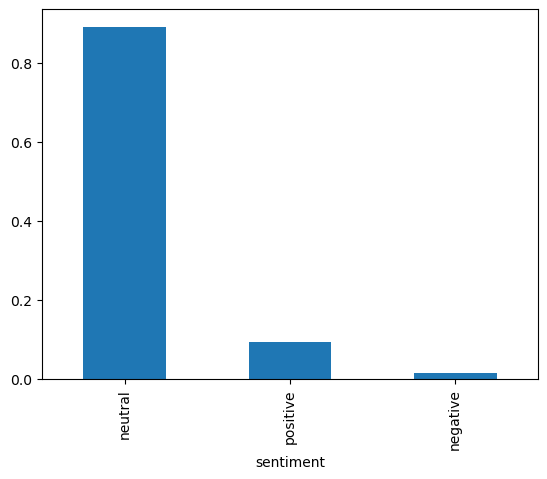

In [182]:
#Second Bonus challenge for English language

#Sentiment distribution in percentages
print(df_eng['sentiment'].value_counts(normalize=True))

#Plot bar
df_eng['sentiment'].value_counts(normalize=True).plot.bar()


<Axes: xlabel='Recommendations'>

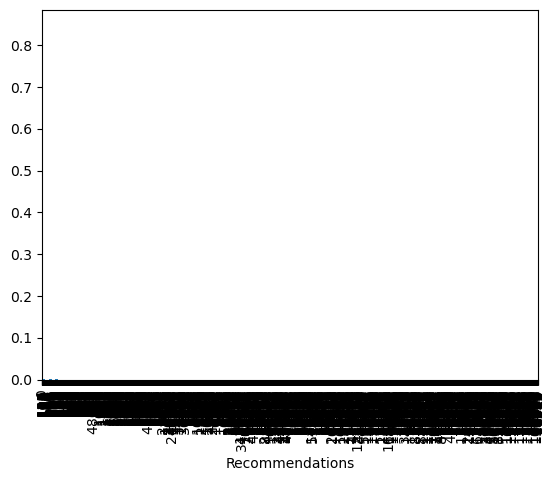

In [186]:
#Third Bonus challenge for English language
df_eng['Recommendations'].value_counts(normalize=True).plot.bar()

In [194]:
df_eng.loc[:, 'sentiment_bin'] = df_eng['sentiment'].apply(lambda x: 0 if x == 'negative' else 1)
df_eng = df_eng.copy()
df_eng['sentiment_bin'] = df_eng['sentiment'].apply(lambda x: 0 if x == 'negative' else 1)


In [202]:
df_eng_cleaned = df_eng.dropna(subset=['sentiment_bin', 'User score'])

from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df_eng_cleaned['sentiment_bin'], df_eng_cleaned['User score'])
print(f"Point-Biserial Correlation: {correlation}")
print(f"P-Value: {p_value}")


Point-Biserial Correlation: -0.004941974039607419
P-Value: 0.14207149786439635


In [206]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=222393b6c60e2193af87aa2bdaa36a7265c2663b1b9e2f34050cefb36912b759
  Stored in directory: /Users/ataberkfirat/Library/Caches/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.2
    Uninstalling httpcore-1.0.2:


In [240]:
import time
from tqdm import tqdm
from googletrans import Translator

translator = Translator()

df_sch_russ = df_csv[(df_csv['Supported languages'].str.contains('chinese')) | 
                     (df_csv['Supported languages'].str.contains('russian'))].copy()

In [248]:
print(df_sch_russ['Reviews'].head())

Series([], Name: Reviews, dtype: object)


In [252]:
df_sch_russ_subset = df_sch_russ.head(5)
df_sch_russ_subset['Reviews_en'] = df_sch_russ_subset['Reviews'].progress_apply(translate_review)
print(df_sch_russ_subset[['Reviews', 'Reviews_en']])

0it [00:00, ?it/s]

Empty DataFrame
Columns: [Reviews, Reviews_en]
Index: []


In [256]:
print("Shape of df_sch_russ:", df_sch_russ.shape)
print(df_sch_russ.head())


Shape of df_sch_russ: (0, 41)
Empty DataFrame
Columns: [AppID, Name, Release date, Estimated owners, Peak CCU, Required age, Price, DiscountDLC count, About the game, Supported languages, Full audio languages, Reviews, Header image, Website, Support url, Support email, Windows, Mac, Linux, Metacritic score, Metacritic url, User score, Positive, Negative, Score rank, Achievements, Recommendations, Notes, Average playtime forever, Average playtime two weeks, Median playtime forever, Median playtime two weeks, Developers, Publishers, Categories, Genres, Tags, Screenshots, Movies, review_en, Reviews_en]
Index: []

[0 rows x 41 columns]


In [258]:
print(df_csv['Supported languages'].unique())


["['English']"
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil', 'Russian', 'Simplified Chinese', 'Traditional Chinese']"
 "['English', 'Portuguese - Brazil']" ...
 "['English', 'French', 'Japanese', 'Korean', 'Portuguese - Portugal', 'Russian', 'Simplified Chinese', 'Traditional Chinese', 'Vietnamese']"
 "['English', 'Russian', 'Ukrainian', 'Spanish - Spain', 'Portuguese - Portugal']"
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Simplified Chinese', 'Japanese', 'Korean', 'Polish', 'Russian', 'Portuguese - Brazil']"]


In [260]:
df_sch_russ = df_csv[df_csv['Supported languages'].str.contains('schinese|russian', case=False, na=False)].copy()


In [262]:
print("Shape of df_sch_russ:", df_sch_russ.shape)
print(df_sch_russ.head())


Shape of df_sch_russ: (19791, 39)
                             AppID          Name    Release date  \
655370                Train Bandit  Oct 12, 2017       0 - 20000   
1355720                   Henosis™  Jul 23, 2020       0 - 20000   
1659180                  TD Worlds   Jan 9, 2022       0 - 20000   
1178150      MazM: Jekyll and Hyde   Apr 2, 2020       0 - 20000   
320150   Deadlings: Rotten Edition  Nov 11, 2014  50000 - 100000   

         Estimated owners  Peak CCU  Required age  Price  DiscountDLC count  \
655370                  0         0          0.99      0                  0   
1355720                 0         0          5.99      0                  0   
1659180                 3         0         10.99      0                  1   
1178150                 1         0         14.99      0                  0   
320150                  0         0          3.99      0                  0   

                                            About the game  \
655370   THE LAW!! L

In [ ]:
# Initialize the translator and tqdm progress bar
translator = Translator()
tqdm.pandas()

def translate_review(text):
    print("Translating:", text) 
    try:
        return translator.translate(text, dest='en').text
    except Exception as e:
        print(f"Error: {e}. Retrying after a brief wait...")
        time.sleep(1)
        return ''

df_sch_russ['Reviews_en'] = df_sch_russ['Reviews'].progress_apply(translate_review)


  0%|                                                 | 0/19791 [00:00<?, ?it/s]

Translating: nan


  0%|                                         | 2/19791 [00:00<36:23,  9.06it/s]

Translating: nan


  0%|                                         | 4/19791 [00:00<55:53,  5.90it/s]

Translating: nan
Translating: nan


  0%|                                       | 6/19791 [00:01<1:02:56,  5.24it/s]

Translating: nan
Translating: “New WW2 Strategy Game Offers A Harrowing Look At Poland's Ill-Fated 1944 Uprising” GameSpot “(…) in execution Warsaw manages to deliver its own experience entirely.” Dualshockers “(…) Beautiful hand-painted artwork and turn-based combat (…)” Gameinformer


  0%|                                       | 7/19791 [00:01<1:05:49,  5.01it/s]

Translating: “Hero of the Kingdom II is a title that casual gamers should find to be very enjoyable, especially those who have appreciated the prequel.” 4.0/5 – Softpedia


  0%|                                       | 8/19791 [00:01<1:08:01,  4.85it/s]

Translating: nan


  0%|                                       | 9/19791 [00:01<1:10:08,  4.70it/s]

Translating: nan


  0%|                                      | 10/19791 [00:01<1:11:42,  4.60it/s]

Translating: nan


  0%|                                      | 11/19791 [00:02<1:12:21,  4.56it/s]

Translating: nan


  0%|                                      | 13/19791 [00:02<1:10:02,  4.71it/s]

Translating: “Reigns: Game of Thrones is so much better than any other attempt to bring Game of Thrones to video games so far.” Digitally Downloaded “A Westerosi romp with welcome wrinkles to the established Reigns formula” Gamespot “Reigns is probably the best Game of Thrones game we’ve played to date.” Trusted Reviews
Translating: nan


  0%|                                      | 14/19791 [00:02<1:09:15,  4.76it/s]

Translating: nan


  0%|                                      | 15/19791 [00:02<1:09:13,  4.76it/s]

Translating: nan


  0%|                                      | 17/19791 [00:03<1:09:12,  4.76it/s]

Translating: nan
Translating: nan


  0%|                                      | 19/19791 [00:03<1:07:47,  4.86it/s]

Translating: “Wholly unique gaming experience that has to be played to be believed” AdventureGamers “A psychological horror masterpiece” Nerdvanamedia “Positively oozes personality” ScaredToPlay
Translating: nan


  0%|                                      | 20/19791 [00:04<1:07:56,  4.85it/s]

Translating: nan


  0%|                                      | 21/19791 [00:04<1:10:52,  4.65it/s]

Translating: nan


  0%|                                      | 22/19791 [00:04<1:12:29,  4.54it/s]

Translating: nan


  0%|                                      | 23/19791 [00:04<1:11:37,  4.60it/s]

Translating: nan


  0%|                                      | 24/19791 [00:04<1:12:53,  4.52it/s]

Translating: nan


  0%|                                      | 25/19791 [00:05<1:12:57,  4.51it/s]

Translating: nan


  0%|                                      | 27/19791 [00:05<1:06:48,  4.93it/s]

Translating: “You know that scene in 'Mad Max: Fury Road' where the cars are coming out after the good guys and they start drumming and rocking on the front of this war vehicle? That’s this whole game — every song is you feeling like you’re out there getting your crew to go faster and it’s just brilliant.” UploadVR “Ragnarock is a must-own title for anyone with a VR setup. It’s simply glorious!” Game Chronicles “Ragnarock is a fantastic new addition to the rhythm action genre and is one of the most enjoyable games to hit VR” The Sixth Axis
Translating: nan


  0%|                                      | 28/19791 [00:05<1:07:42,  4.86it/s]

Translating: nan


  0%|                                      | 29/19791 [00:05<1:09:25,  4.74it/s]

Translating: nan


  0%|                                      | 30/19791 [00:06<1:09:35,  4.73it/s]

Translating: nan


  0%|                                      | 31/19791 [00:06<1:11:19,  4.62it/s]

Translating: nan


  0%|                                      | 32/19791 [00:06<1:10:52,  4.65it/s]

Translating: nan


  0%|                                      | 33/19791 [00:06<1:14:37,  4.41it/s]

Translating: “The skiing feels good.” VRheadset “This is a cool early access skiing game. It's a good variation for your cardio / upper body workout. To burn extra calories, instead of finishing the course, turn around and ski back up the hill! There's a shooting range as well if you want some target practice.” Explore VR


  0%|                                      | 35/19791 [00:07<1:08:25,  4.81it/s]

Translating: “Journey stands as a prime example of the truly remarkable things that can be done via this medium.” 10/10 – Giant Bomb “The mechanics are simple, but they establish a direct connection to the heart.” 10/10 – Gamespot “Journey's visual and sound design sets new standards for interactive entertainment. This alone makes it an extraordinary work, but it's the way that these aesthetic elements come together with beautifully subtle direction and storytelling to create a lasting emotional effect that elevates this to one of the very best games of our time.” 10/10 – The Guardian
Translating: “Hours of enjoyment, and limitless pointless possibilities” 10/10 – NullReferenceException “Now this is epic” 5/5 – Toomuch Entertainment “This game looks so fun” 9/10 – Wakabuggie


  0%|                                      | 36/19791 [00:07<1:10:24,  4.68it/s]

Translating: nan


  0%|                                      | 38/19791 [00:07<1:05:49,  5.00it/s]

Translating: “With this rich, emotional overlay, coupled with some deep, appealing mechanics, CHANGE is an enthralling survival experience from start to finish.” New Game Network “Change is a gritty, hand-crafted, labor of love that transcends its simple, pixilated aesthetic. It asks questions of the player which will hopefully be pondered at some point during playthroughs. I know I did.” CyberPowerPC “PREVIEW: ...the game says a bit more, a bit more deeply, about being homeless. And it starts to sink in, the bleak reality, even though the graphics are pixelated and even though it is, inescapably, a game experience.” Eurogamer
Translating: nan


  0%|                                      | 39/19791 [00:08<1:10:14,  4.69it/s]

Translating: nan


  0%|                                      | 40/19791 [00:08<1:09:56,  4.71it/s]

Translating: nan


  0%|                                      | 41/19791 [00:08<1:09:47,  4.72it/s]

Translating: nan


  0%|                                      | 42/19791 [00:08<1:09:47,  4.72it/s]

Translating: nan


  0%|                                      | 43/19791 [00:08<1:11:33,  4.60it/s]

Translating: nan


  0%|                                      | 44/19791 [00:09<1:12:06,  4.56it/s]

Translating: nan


  0%|                                      | 45/19791 [00:09<1:11:53,  4.58it/s]

Translating: nan


  0%|                                      | 46/19791 [00:09<1:12:02,  4.57it/s]

Translating: nan


  0%|                                      | 48/19791 [00:10<1:11:43,  4.59it/s]

Translating: “As simulation games go few can match Valhalla Hills […]. It combines all the best parts of other simulation games into one great package.” 4/5 – Nerd Age “I was right at home when playing Valhalla Hills. It carries the spirit of strategy simulations like Settlers and Cultures really well.” Gamestar “Valhalla Hills is a fun game that any fan of The Settlers or any similar game would enjoy.” 8/10 – Tenton Hammer
Translating: nan


  0%|                                      | 49/19791 [00:10<1:10:44,  4.65it/s]

Translating: nan


  0%|                                      | 50/19791 [00:10<1:09:55,  4.71it/s]

Translating: nan


  0%|                                      | 51/19791 [00:10<1:17:50,  4.23it/s]

Translating: nan


  0%|                                      | 52/19791 [00:11<1:17:13,  4.26it/s]

Translating: “All things are possible in this beautifully observed visual novel.” Rock Paper Shotgun “One Night Stand is a small, polished slice of what feels like a real human interaction.” Kotaku “This is the kind of indie experimental experience that proves games really can cover a gamut of emotions.” Playboy


  0%|                                      | 54/19791 [00:11<1:11:59,  4.57it/s]

Translating: “It’s a solid game, full of wit and humor.” PC Games n News “The look and design appealed enormously.” GameBoomers “If you love sci-fi, the theme of isolation, and weird animal astronauts, you’ll have a good time with Tales of Cosmos.” GameSkinny
Translating: nan


  0%|                                      | 55/19791 [00:11<1:11:18,  4.61it/s]

Translating: nan


  0%|                                      | 57/19791 [00:12<1:07:36,  4.86it/s]

Translating: “Interesting mechanics, exciting story and a few bugs make this global strategy game great choice for all the lovers of foreign affairs and military interventions” 8/10 – Gamefun “Realpolitiks is a very fun, polished, easy to use grand strategy game that will suck up your time and you won’t regret any of it” 8/10 – Voletic “Realpolitiks is the right solution for anyone who wants to try their hand at the role of leader of one of the world superpowers or even a state of minor importance” 7.5/10 –
Translating: “Ultra Hat Dimension is a perfect example of how wonderful things can happen if you polish up a simple idea and execute it well. If you like your puzzle games smart and heavy on the charm, this is the title for you.” Jay Is Games “Contrary to how it may at first sound, Ultra Hat Dimension is not a washed up European trance DJ duo, but is an excellent puzzle game that features all of the aforementioned head dressings.” Rock Paper Shotgun


  0%|                                      | 58/19791 [00:12<1:38:31,  3.34it/s]

Translating: nan


  0%|                                      | 59/19791 [00:12<1:34:59,  3.46it/s]

Translating: nan


  0%|                                      | 60/19791 [00:13<1:27:51,  3.74it/s]

Translating: nan


  0%|                                      | 61/19791 [00:13<1:21:26,  4.04it/s]

Translating: “WT:L has truly turned out to be a one-of-a-kind title. It's a rare case when a studio tackles a bold task and manages to create a game never seen before.” IGN “WT:L is a fantastic puzzle game” 8.5 – Culture Of Gaming “Want to understand neural networks? This game might teach you how.” PC Gamer


  0%|                                      | 62/19791 [00:13<1:17:39,  4.23it/s]

Translating: nan


  0%|                                      | 63/19791 [00:13<1:16:01,  4.33it/s]

Translating: nan


  0%|                                      | 64/19791 [00:13<1:16:56,  4.27it/s]

Translating: nan


  0%|                                      | 65/19791 [00:14<1:15:28,  4.36it/s]

Translating: nan


  0%|▏                                     | 66/19791 [00:14<1:13:53,  4.45it/s]

Translating: nan


  0%|▏                                     | 67/19791 [00:14<1:12:02,  4.56it/s]

Translating: nan


  0%|▏                                     | 68/19791 [00:14<1:13:34,  4.47it/s]

Translating: nan


  0%|▏                                     | 69/19791 [00:14<1:12:43,  4.52it/s]

Translating: nan


  0%|▏                                     | 70/19791 [00:15<1:11:29,  4.60it/s]

Translating: nan


  0%|▏                                     | 71/19791 [00:15<1:13:39,  4.46it/s]

Translating: nan


  0%|▏                                     | 72/19791 [00:15<1:14:35,  4.41it/s]

Translating: nan


  0%|▏                                     | 73/19791 [00:15<1:13:42,  4.46it/s]

Translating: nan


  0%|▏                                     | 74/19791 [00:16<1:12:59,  4.50it/s]

Translating: nan


  0%|▏                                     | 75/19791 [00:16<1:12:33,  4.53it/s]

Translating: nan


  0%|▏                                     | 76/19791 [00:16<1:12:08,  4.55it/s]

Translating: “Games are best when played full screen, but many won't play nice with Alt+Tab in full screen mode—which means you can't look at your browser for a guide or change the music playing in the background. Borderless Gaming fixes that problem.” LifeHacker “Without a doubt, this is essential software when considering how many publishers treat PC gaming as an afterthought.” dtyujb


  0%|▏                                     | 77/19791 [00:16<1:12:38,  4.52it/s]

Translating: nan


  0%|▏                                     | 78/19791 [00:16<1:12:14,  4.55it/s]

Translating: nan


  0%|▏                                     | 80/19791 [00:17<1:08:12,  4.82it/s]

Translating: 'The emotional investment in the game and its characters is impressive and the exceptional writing reinforces the connection to the world.' 8/10 – -expeditions-conquistador 'For me personally, this is one of the best and most unique games that I’ve played this year.' 9/10 - Hooked Gamers 'Expeditions: Conquistador is an entertaining and immersive experience from start to finish.' 9/10 - -conquistadors-review-heaps-of-historical-enjoyment/ 'Expeditions: Conquistador delivers a solid and engaging experience.' 'When it comes down to the boiling point, Expeditions: Conquistador is a highly recommended tactical role playing game.' -expeditions-conquistador-pc.html
Translating: nan


  0%|▏                                     | 81/19791 [00:17<1:07:58,  4.83it/s]

Translating: nan


  0%|▏                                     | 82/19791 [00:17<1:08:09,  4.82it/s]

Translating: nan


  0%|▏                                     | 83/19791 [00:18<1:08:25,  4.80it/s]

Translating: nan


  0%|▏                                     | 84/19791 [00:18<1:09:13,  4.74it/s]

Translating: “Are you kidding me? That's a troll.” Jonathan Blow


  0%|▏                                     | 85/19791 [00:18<1:09:30,  4.72it/s]

Translating: “Good game” 10/10 – ФоркМэн [Youtubeъ - 350.000]


  0%|▏                                     | 86/19791 [00:19<2:20:23,  2.34it/s]

Translating: nan


  0%|▏                                     | 87/19791 [00:19<1:58:50,  2.76it/s]

Translating: nan


  0%|▏                                     | 88/19791 [00:19<1:47:01,  3.07it/s]

Translating: nan


  0%|▏                                     | 89/19791 [00:20<1:35:25,  3.44it/s]

Translating: “A title you should definitely play if you enjoy puzzles and enjoy a good story that is not spelled out for you.” 80/100 – 366GameReviews “I found Empathy: Path of Whispers to be incredible.” 80/100 – OPNoobs “The story might be the most interesting one I have encountered in the genre” 95/100 – The Inner Circle


  0%|▏                                     | 90/19791 [00:20<1:27:57,  3.73it/s]

Translating: nan


  0%|▏                                     | 91/19791 [00:20<1:28:40,  3.70it/s]

Translating: “4 Zones with different aesthetics 4 types of puzzles with a frisbee to solve And most importantly... 4 fun!” Steam Reviewer “this game is amazing! So much fun. It's been really fun to play!” Steam Reviewer


  0%|▏                                     | 92/19791 [00:20<1:26:01,  3.82it/s]

Translating: nan


  0%|▏                                     | 93/19791 [00:21<1:25:45,  3.83it/s]

Translating: “I have been ungodly addicted to this game...” The SML Podcast “Every time I thought I had experienced everything, I encountered something new and unexpected.” BleepBloop Reviews “One for hack ‘n’ slash fans to keep an eye out for...” GamersFTW


  0%|▏                                     | 94/19791 [00:21<1:21:46,  4.01it/s]

Translating: nan


  0%|▏                                     | 95/19791 [00:21<1:18:28,  4.18it/s]

Translating: nan


  0%|▏                                     | 97/19791 [00:21<1:17:57,  4.21it/s]

Translating: nan
Translating: nan


  0%|▏                                     | 98/19791 [00:22<1:16:15,  4.30it/s]

Translating: “Graphics looks nice... this game kinda looks serious” DashieGames “Reminded me a lot of Resident Evil and Outlast 2” Neurobew “This could be promising after seeing the trailer at the end” Caspersight


  1%|▏                                     | 99/19791 [00:22<1:14:55,  4.38it/s]

Translating: nan


  1%|▏                                    | 101/19791 [00:22<1:10:55,  4.63it/s]

Translating: nan
Translating: nan


  1%|▏                                    | 102/19791 [00:23<1:10:26,  4.66it/s]

Translating: nan


  1%|▏                                    | 103/19791 [00:23<1:13:39,  4.45it/s]

Translating: nan


  1%|▏                                    | 104/19791 [00:23<1:14:51,  4.38it/s]

Translating: nan


  1%|▏                                    | 105/19791 [00:23<1:15:32,  4.34it/s]

Translating: “醉汉视角的赛车游戏？Steam最近上线了一款非常魔性的独立搞笑游戏《醉驾模拟器》（《Need for Spirit: Drink &amp; Drive Simulator》），玩家扮演一名憨厚的货车司机师傅，游戏中最大的障碍是你浓郁的醉意[吐]，” 电玩巴士 - 520k followers on weibo - Alexa Rank - 20(global) “《醉驾模拟器》登陆Steam 深刻感悟醉驾带来的危害” GamerSky - Alexa Rank - 470(global) “DRIVING DRUNK? WHY NOT! l Need for Spirit Simulator - review on his gaming channel” LoreChirik - 740k youtube subscribers


  1%|▏                                    | 106/19791 [00:25<3:17:29,  1.66it/s]

Translating: nan


  1%|▏                                    | 107/19791 [00:25<2:40:59,  2.04it/s]

Translating: nan


  1%|▏                                    | 109/19791 [00:25<1:52:02,  2.93it/s]

Translating: nan
Translating: nan


  1%|▏                                    | 111/19791 [00:26<1:29:46,  3.65it/s]

Translating: “Elegant, atmospheric, and energetic, [Julian] Gollop’s latest remains remarkably hard to put down.” 8/10 – PCGamesN “If you like XCOM then you’re going to love Phoenix Point.” 9/10 – Trusted Reviews “Phoenix Point is, without a doubt, one of the best strategy games to come out in the last few years.” 9/10 – Noisy Pixel
Translating: “If you are in the mood for something restful, I’d say it’s well worth dipping a toe in the water.” Rock Paper Shotgun “Lumini is a beautiful, relaxing and captivating experience… even if you think it’s not for you, I urge you to grab a gamepad and spend some time with it” 9/10 – Entertainment Focus “The type of game where you find yourself making detours or flying in loops just because it feels awesome doing so” 9/10 – Gameramble


  1%|▏                                    | 112/19791 [00:26<1:21:44,  4.01it/s]

Translating: nan


  1%|▏                                    | 113/19791 [00:26<1:17:52,  4.21it/s]

Translating: nan


  1%|▏                                    | 114/19791 [00:26<1:18:20,  4.19it/s]

Translating: nan


  1%|▏                                    | 115/19791 [00:27<1:16:27,  4.29it/s]

Translating: nan


  1%|▏                                    | 116/19791 [00:27<1:14:09,  4.42it/s]

Translating: “Качественная реалистичная RTS, практически не имеющая современных аналогов и конкурентов и способная растопить сердце самого либерального любителя стратегий. А для патриотических тактиков это просто жемчужина.” 7.7 – Riot Pixels “Фанаты жанра в лице «Сирии» получили отличную стратегию — зрелищную, сложную и реалистичную, а также позволяющую почти для каждого боя придумать с полдесятка вариантов прохождения.” 8.0 – Игры@mail ru “Резюмируя (и перефразируя одного из персонажей “Белого солнца пустыни”) - за Державу НЕ обидно.” 8.4 – Gmbox


  1%|▏                                    | 117/19791 [00:28<3:26:06,  1.59it/s]

Translating: nan


  1%|▏                                    | 118/19791 [00:29<2:45:42,  1.98it/s]

Translating: nan


  1%|▏                                    | 119/19791 [00:29<2:18:49,  2.36it/s]

Translating: “BadLands RoadTrip is a promising open world physics based shooter with RPG elements” Alpha Beta Gamer “Give it a shot, if only for the pleasure of turning your lousy old pea shooter into a four-barreled semi-automatic revolver that shoots exploding rubber balls.”


  1%|▏                                    | 121/19791 [00:29<1:47:48,  3.04it/s]

Translating: nan
Translating: nan


  1%|▏                                    | 122/19791 [00:30<1:37:00,  3.38it/s]

Translating: “Meant to be played over and over again... Building on the excellent Mini Metro that came before it, Mini Motorways is a great evolution of Dinosaur Polo Club's minimalist transport sim.” Bestest Best – Rock Paper Shotgun “A city builder that balances precision and beauty.” Essential – Eurogamer “Endlessly replayable, beautiful to look at and featuring engrossing gameplay, this is another roaring success.” Traxion


  1%|▏                                    | 123/19791 [00:30<1:28:22,  3.71it/s]

Translating: nan


  1%|▏                                    | 124/19791 [00:30<1:23:28,  3.93it/s]

Translating: nan


  1%|▏                                    | 125/19791 [00:30<1:20:35,  4.07it/s]

Translating: nan


  1%|▏                                    | 126/19791 [00:30<1:16:53,  4.26it/s]

In [ ]:
df_sch_russ['review'] = df_sch_russ['review_en']
df_sch_russ.drop('review_en', axis=1, inplace=True)


In [ ]:
df_sch_russ['Reviews'] = df_sch_russ['review_en']
df_sch_russ.drop('review_en', axis=1, inplace=True)

df_sch_russ.dropna(subset = ['Reviews'], inplace=True)
if 'Unnamed: 0' in df_sch_russ.columns:
    df_sch_russ.drop('Unnamed: 0', axis=1, inplace=True)